## Lab5

### Desarrollado por:
- Alejandro Gómez
- Gabriela Contreras
- Roberto Vallecillos

### Exploración de datos

In [81]:
# Librerias a usar

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import math

In [82]:
# Cargar el dataset

phishing = pd.read_csv('dataset_phishing.csv')

# Ver las primeras 5 filas
phishing.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


<AxesSubplot:>

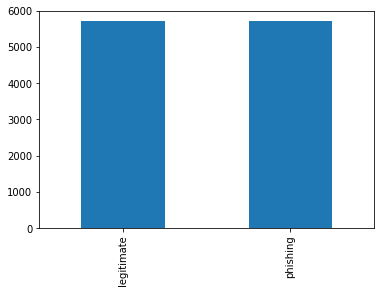

In [83]:
# Gráficos exploratorios

phishing['status'].value_counts()
phishing['status'].value_counts().plot(kind='bar')

Se observa que la data está balanceada con 50% de phishing y 50% de datos reales.
Con esto podemos saber que, la data no tiene ningún tipo de bias, ni es necesario cambiar el sampling de esta. Así que, podemos decir que es un dataste balanceado, desde el contexto del phishing, lo cual nos interesa analizar para este laboratorio.

In [84]:
# Ver la correlación entre las variables
phishing.corr()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
length_url,1.000000,0.223025,0.453961,0.443589,0.399564,0.150739,0.520930,0.576268,NaN,0.621745,...,0.041879,0.125159,-0.006476,-0.007082,0.002799,-0.006798,0.072205,0.023357,0.236395,-0.102582
length_hostname,0.223025,1.000000,0.252013,0.408956,0.057702,0.071793,0.162400,0.145617,NaN,0.183405,...,-0.015054,0.217284,0.074707,-0.097794,-0.041081,0.013854,0.163238,-0.023344,0.213990,-0.159342
ip,0.453961,0.252013,1.000000,0.288398,0.109860,0.059401,0.405434,0.383262,NaN,0.440972,...,0.037971,0.137716,0.014561,0.053246,-0.108869,-0.077020,0.167930,0.127823,0.270743,-0.218968
nb_dots,0.443589,0.408956,0.288398,1.000000,0.045099,0.263283,0.347411,0.435798,NaN,0.414902,...,0.040875,0.107789,0.055560,0.056407,-0.024117,-0.007818,0.087969,0.126659,0.209616,-0.097312
nb_hyphens,0.399564,0.057702,0.109860,0.045099,1.000000,0.018770,0.036804,0.120487,NaN,0.107050,...,-0.033302,0.006909,0.020297,-0.055794,0.038163,0.080104,-0.041464,-0.031477,-0.018828,0.104341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
domain_age,-0.006798,0.013854,-0.077020,-0.007818,0.080104,-0.067334,-0.045623,-0.043933,NaN,-0.039726,...,-0.069671,-0.174976,0.051116,-0.275520,0.269109,1.000000,-0.096698,-0.068023,-0.210111,0.589602
web_traffic,0.072205,0.163238,0.167930,0.087969,-0.041464,-0.009459,0.143777,0.164797,NaN,0.187809,...,-0.030888,0.081786,0.083888,0.022598,-0.110435,-0.096698,1.000000,-0.007113,0.034099,-0.209526
dns_record,0.023357,-0.023344,0.127823,0.126659,-0.031477,0.031611,0.009441,0.076372,NaN,0.052159,...,0.006232,0.062084,0.043817,0.213899,-0.060811,-0.068023,-0.007113,1.000000,0.096413,-0.142135
google_index,0.236395,0.213990,0.270743,0.209616,-0.018828,0.113217,0.201260,0.129093,NaN,0.167385,...,0.208367,0.267465,-0.143655,0.040633,-0.134656,-0.210111,0.034099,0.096413,1.000000,-0.389887


In [85]:

# Tipos de datos en columnas
intConteo = 0
stringConteo = 0
floatConteo = 0
for i in phishing.columns:
   
    if phishing[i].dtype == 'int64':
        intConteo += 1
    if phishing[i].dtype == 'object':
        stringConteo += 1
    if phishing[i].dtype == 'float64':
        floatConteo += 1
        
print('Cantidad de variables tipo int: ', intConteo)
print('Cantidad de variables tipo string: ', stringConteo)
print('Cantidad de variables tipo float: ', floatConteo)
print('\nTotal de variables clasificadas: ', intConteo + stringConteo + floatConteo)

print("Total columnas en dataset:" , phishing.shape[1])

Cantidad de variables tipo int:  74
Cantidad de variables tipo string:  2
Cantidad de variables tipo float:  13

Total de variables clasificadas:  89
Total columnas en dataset: 89


In [86]:
# Encoding de variables (para status)

dataSetProcesado = phishing.copy()

statusDato = pd.get_dummies(dataSetProcesado['status'], prefix='status')

dataSetProcesado = pd.concat([dataSetProcesado, statusDato], axis=1)

dataSetProcesado.drop(['status'], axis=1, inplace=True)



In [87]:
# Eliminar columnas que no aportan información

# Eliminar columna url
dataSetProcesado.drop(['url'], axis=1, inplace=True)


In [88]:
# Escalar variables

escalar = StandardScaler()

dataEscalada = escalar.fit_transform(dataSetProcesado)

minMax = MinMaxScaler()

dataEscaladaMinMax = minMax.fit_transform(dataSetProcesado)

In [ ]:
# Separar en train y testing

In [89]:
# K-Nearest Neighbors

# La distancia entre puntos debe ser la dada por la forma de la distancia Euclidiana
def DistanciaEuclidiana(x1, x2):
    distancia = 0
    for i in range(len(x1)):
        distancia += (x1[i] - x2[i])**2
    return math.sqrt(distancia)

def KNN(pandas, q, k):
    distancias = []
    for i, j in pandas.iterrows():
        x = j[:-1]
        y = j[-1]
        distancia = DistanciaEuclidiana(x, q)
        distancias.append((distancia, y))
    distancias.sort()
    neighbors = [distancias[i][1] for i in range(k)]
    prediccion = max(set([i[1] for i in neighbors]), key = neighbors.count)
    return prediccion